In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('../input/creditcard.csv')
df.head()

Using TensorFlow backend.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
def feature_summary(df_fa):
    print('DataFrame shape')
    print('rows:',df_fa.shape[0])
    print('cols:',df_fa.shape[1])
    col_list=['Null','Unique_Count','Data_type','Max/Min','Mean','Std','Skewness','Sample_values']
    df=pd.DataFrame(index=df_fa.columns,columns=col_list)
    df['Null']=list([len(df_fa[col][df_fa[col].isnull()]) for i,col in enumerate(df_fa.columns)])
    #df['%_Null']=list([len(df_fa[col][df_fa[col].isnull()])/df_fa.shape[0]*100 for i,col in enumerate(df_fa.columns)])
    df['Unique_Count']=list([len(df_fa[col].unique()) for i,col in enumerate(df_fa.columns)])
    df['Data_type']=list([df_fa[col].dtype for i,col in enumerate(df_fa.columns)])
    for i,col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col,'Max/Min']=str(round(df_fa[col].max(),2))+'/'+str(round(df_fa[col].min(),2))
            df.at[col,'Mean']=df_fa[col].mean()
            df.at[col,'Std']=df_fa[col].std()
            df.at[col,'Skewness']=df_fa[col].skew()
        df.at[col,'Sample_values']=list(df_fa[col].unique())
           
    return(df.fillna('-'))

### data

In [3]:
feature_summary(df)

DataFrame shape
rows: 284807
cols: 31


,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values
Time,0,124592,float64,172792.0/0.0,9.481386e+04,47488.145955,-0.035568,"[0.0, 1.0, 2.0, 4.0, 7.0, 9.0, 10.0, 11.0, 12...."
V1,0,275663,float64,2.45/-56.41,3.919560e-15,1.958696,-3.280667,"[-1.3598071336738, 1.1918571113148602, -1.3583..."
V2,0,275663,float64,22.06/-72.72,5.688174e-16,1.651309,-4.624866,"[-0.0727811733098497, 0.26615071205963, -1.340..."
V3,0,275663,float64,9.38/-48.33,-8.769071e-15,1.516255,-2.240155,"[2.53634673796914, 0.16648011335321, 1.7732093..."
V4,0,275663,float64,16.88/-5.68,2.782312e-15,1.415869,0.676292,"[1.37815522427443, 0.448154078460911, 0.379779..."
V5,0,275663,float64,34.8/-113.74,-1.552563e-15,1.380247,-2.425901,"[-0.33832076994251803, 0.0600176492822243, -0...."
V6,0,275663,float64,73.3/-26.16,2.010663e-15,1.332271,1.826581,"[0.462387777762292, -0.0823608088155687, 1.800..."
V7,0,275663,float64,120.59/-43.56,-1.694249e-15,1.237094,2.553907,"[0.239598554061257, -0.0788029833323113, 0.791..."
V8,0,275663,float64,20.01/-73.22,-1.927028e-16,1.194353,-8.521944,"[0.0986979012610507, 0.0851016549148104, 0.247..."
V9,0,275663,float64,15.59/-13.43,-3.137024e-15,1.098632,0.554680,"[0.363786969611213, -0.255425128109186, -1.514..."


In [4]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [6]:
# Turn into an array
original_Xtrain = X_train.values
original_Xtest = X_test.values
original_ytrain = y_train.values
original_ytest = y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


#### EDA and other feature engineering skipped in this notebook

### SMOTE oversampling

#### SMOTE:

1. Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

2. Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

3. Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.

4. Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

#### Note: we should do the cross validation before SMOTE oversampling

### Logistic Regression with SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [9]:
%%time
# Implementing SMOTE Technique 
# Cross Validating the right way

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 35)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print('---' * 35)

---------------------------------------------------------------------------------------------------------

accuracy: 0.9617771496324765
precision: 0.06319737177574562
recall: 0.9136319376825707
f1: 0.11670986563084436
AUC: 0.9377461336251234
---------------------------------------------------------------------------------------------------------
CPU times: user 10min 36s, sys: 15.8 s, total: 10min 51s
Wall time: 10min 43s


In [10]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

   micro avg       0.99      0.99      0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



### XGB with SMOTE

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier

#### without SMOTE to see the optimal paramaters

#### GridSearchCV

In [14]:
# %%time
# GridSearchCV
# from sklearn.model_selection import GridSearchCV

# xgb_params = {"eta": [0.02,0.05,0.1], 
#              'min_child_weight': [50,100,200,300,360],
#              'subsample':[0.5,0.7,0.8,0.9],
#              "colsample_bytree":[0.3,0.5,0.7,0.9],
#              "max_depth":[8,10,12,15],
#              'objective':['binary:logistic',"reg:linear"]
#             }

#xgb_sm = XGBClassifier()
#grid_xgb = GridSearchCV(xgb_sm, xgb_params)
#grid_xgb.fit(X_train, y_train)
#get the best estimator
#best_est_grid = grid_xgb.best_estimator_

#### RandomizedSearchCV

In [ ]:
%%time
# RandomizedSearchCV
# fit model no training data

xgb_params = {"eta": [0.01,0.02,0.03,0.05,0.8,0.1], 
              'min_child_weight': [50,100,200,300,360,500],
              'subsample':[0.5,0.7,0.8,0.9,0.95,0.99],
              "colsample_bytree":[0.3,0.5,0.7,0.9,0.99],
              "max_depth":[6,8,10,12]
             }

xgb_sm = XGBClassifier()
rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=6)
rand_xgb.fit(X_train,y_train)
best_est_ran = rand_xgb.best_estimator_

#### Using SMOTE with optimal parameters

In [13]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eta=0.8, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=12, min_child_weight=50, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [15]:
%%time
# Implementing SMOTE Technique 
# Cross Validating the right way

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), best_xgb) 
    # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    prediction = best_xgb.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 35)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print('---' * 35)

---------------------------------------------------------------------------------------------------------

accuracy: 0.9732519130855734
precision: 0.1977601946427154
recall: 0.8919993508601104
f1: 0.25611878938844557
AUC: 0.9326958526031068
---------------------------------------------------------------------------------------------------------
CPU times: user 10min 38s, sys: 1.78 s, total: 10min 39s
Wall time: 10min 39s


In [17]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_xgb.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.90      0.73      0.81        98

   micro avg       1.00      1.00      1.00     56961
   macro avg       0.95      0.87      0.90     56961
weighted avg       1.00      1.00      1.00     56961



### Keras with one hidden layer

In [16]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])

# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 5s - loss: 0.0682 - acc: 0.9759 - val_loss: 0.0270 - val_acc: 0.9928
Epoch 2/20
 - 3s - loss: 0.0146 - acc: 0.9963 - val_loss: 0.0079 - val_acc: 0.9996
Epoch 3/20
 - 3s - loss: 0.0075 - acc: 0.9985 - val_loss: 0.0069 - val_acc: 0.9997
Epoch 4/20
 - 3s - loss: 0.0052 - acc: 0.9990 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 5/20
 - 3s - loss: 0.0041 - acc: 0.9992 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 6/20
 - 3s - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 7/20
 - 3s - loss: 0.0028 - acc: 0.9995 - val_loss: 8.0757e-04 - val_acc: 1.0000
Epoch 8/20
 - 3s - loss: 0.0025 - acc: 0.9995 - val_loss: 8.4267e-04 - val_acc: 0.9999
Epoch 9/20
 - 3s - loss: 0.0021 - acc: 0.9996 - val_loss: 3.2615e-04 - val_acc: 1.0000
Epoch 10/20
 - 3s - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 11/20
 - 3s - loss: 0.0019 - acc: 0.9996 - val_loss:

In [20]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [21]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[56851    12]
 [   34    64]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


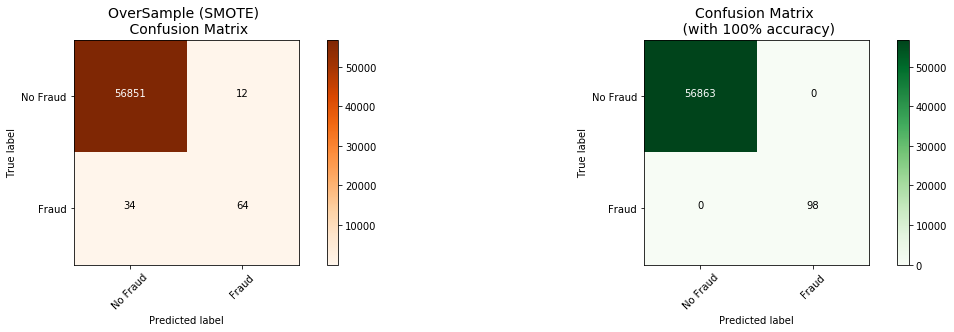

In [28]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)